<a href="https://colab.research.google.com/github/Devscoding/MAT421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **22.4 Numerical Error and Instability**

When dealing with integration approximations for ODEs there are two main issues that arise, accuracy and stability. The **Accuracy** of an approximation refers to a scheme's ability to get as close to the exact solution as a function of step size $h$. Whereas **Stability** of an integration scheme is the scheme's ability to not let the error grow over time, we say a scheme is stable if over time the error does not increase/grow. Some schemes are stable for certain step sizes of $h$ and unstable for others.

We will show an example of error and stability of Euler Explicit, Euler Implicit, and Trapezoidal Formulas in the modeling of a pendulum

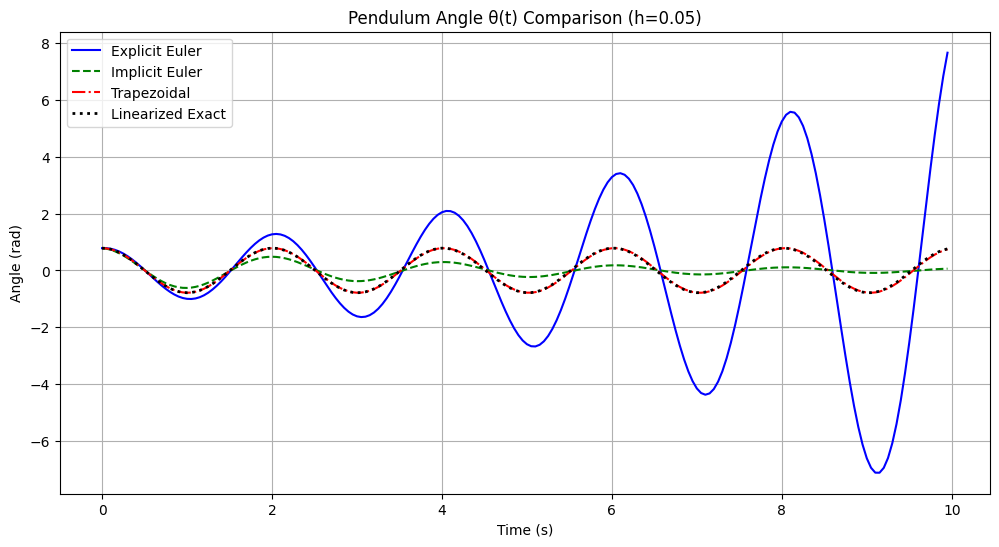

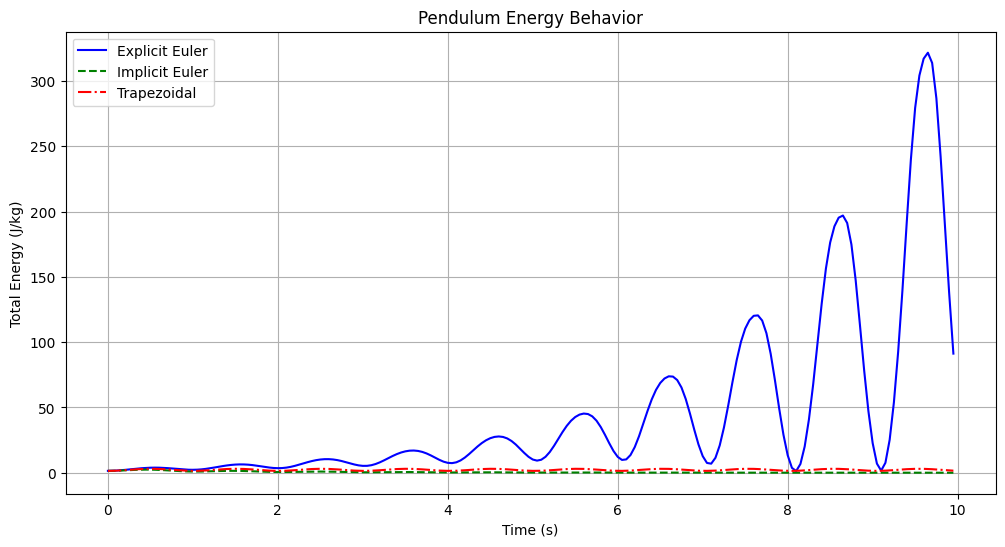

In [13]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Pendulum parameters
g = 9.81
L = 1.0
ω = np.sqrt(g/L)

h = 0.05                   # step size
t = np.arange(0, 10, h)    # numerical grid

# Initial conditions [angle, angular velocity]
s0 = np.array([[np.pi/4], [0]])

# System matrix for linearized pendulum
A = np.array([[0, 1], [-ω**2, 0]])

# Schemes
I = np.eye(2)
m_e = I + h*A                              # Explicit Euler
m_i = inv(I - h*A)                         # Implicit Euler
m_t = inv(I - h/2*A) @ (I + h/2*A)         # Trapezoidal

# Initializations
s_e = np.zeros((len(t), 2))  # Explicit
s_i = np.zeros((len(t), 2))  # Implicit
s_t = np.zeros((len(t), 2))  # Trapezoidal
s_e[0,:] = s0.T
s_i[0,:] = s0.T
s_t[0,:] = s0.T

# Time stepping
for j in range(len(t)-1):
    s_e[j+1,:] = m_e @ s_e[j,:]
    s_i[j+1,:] = m_i @ s_i[j,:]
    s_t[j+1,:] = m_t @ s_t[j,:]

# Plot Solutions
plt.figure(figsize=(12, 6))
plt.plot(t, s_e[:,0], 'b-', label='Explicit Euler')
plt.plot(t, s_i[:,0], 'g--', label='Implicit Euler')
plt.plot(t, s_t[:,0], 'r-.', label='Trapezoidal')

# Exact solution for comparison
plt.plot(t, s0[0]*np.cos(ω*t), 'k:', label='Linearized Exact', linewidth=2)

plt.title('Pendulum Angle θ(t) Comparison (h=0.05)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.grid(True)
plt.show()

# Energy stability plot
plt.figure(figsize=(12, 6))
energy_e = 0.5*(L**2*s_e[:,1]**2 + g*L*(1-np.cos(s_e[:,0])))
energy_i = 0.5*(L**2*s_i[:,1]**2 + g*L*(1-np.cos(s_i[:,0])))
energy_t = 0.5*(L**2*s_t[:,1]**2 + g*L*(1-np.cos(s_t[:,0])))

plt.plot(t, energy_e, 'b-', label='Explicit Euler')
plt.plot(t, energy_i, 'g--', label='Implicit Euler')
plt.plot(t, energy_t, 'r-.', label='Trapezoidal')

plt.title('Pendulum Energy Behavior')
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (J/kg)')
plt.legend()
plt.grid(True)
plt.show()

# **22.5 Predictor-Corrector Methods**
When solving initial value problems we use **Predictor-corrector** methods to improve our approximations  in a two step process first by querying the function $F(t,S(t))$, that returns the state $\frac{dS(t)}{dt}$, multiple times at different points (predictions), then second using a weighted average of said results (corrections) to update the state.

For example the **Mid-point method** has a predictor step:

$S(t_j+\frac{h}{2})=S(t_j) + \frac{h}{2}F(t_j,S(t_j))$

Which is the prediction of the value halfway between $t_j$ and $t_{j+1}$

The corrector step goes as follows:

$S(t_{j+1})=S(t_j) + hF(t_j + \frac{h}{2}, S(t_j + \frac{h}{2}))$

Which finds the solution at $S(t_{j+1})$ from $S(t_j)$ using the derivative from $S(t_j+\frac{h}{2})$
